In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(pd.__version__, np.__version__)

1.3.3 1.21.2


In [36]:
def load_data_from_csv(filename : str):
    # loading and returning ndarray type
    import pandas as pd
    data_frame = pd.read_csv(filename, index_col=0)
    return data_frame.to_numpy()


def build_histogram(data : list, title : str = "histogram", n_bins : int = 10, param_range : tuple = (False, False)):
    import matplotlib.pyplot as plt

    # do not know how to do same more reliable, sorry
    used_range = ()
    first, second = param_range
    if (first == second == False):
        used_range = (data.min(), data.max())
    else:
        used_range = param_range

    plt.hist(data, bins=n_bins, range=used_range)
    plt.title(title)
    plt.show()


def load_multiple_csvs(sample_data : list, default_csv_data_folder : str = "./csv_data"):
    '''
        returns nothing!\n
        fill input array with data
    '''
    import os
    csvs_filenames = os.listdir(default_csv_data_folder)
    
    numpy_arrays = []
    for csv_filename in csvs_filenames:
        relative_path = default_csv_data_folder + "/" + csv_filename
        if ("dataset" in csv_filename):
            current_array = load_data_from_csv(relative_path)
            numpy_arrays.append(current_array)

    sample_data.append(np.concatenate(numpy_arrays))

def get_det_coords(detectors_coords_list : list):
    csv_data_default_folder = "./"
    csv_default_filename = "../assist_data/detector_coords.csv"

    full_relative_name = csv_data_default_folder + "/" + csv_default_filename
    csv_raw_data = pd.read_csv(full_relative_name, index_col=0)
    for row in csv_raw_data.iterrows():
        # `uid` is equal list idxs, dont need to add same info
        current_det = {"x": row[1][7], "y": row[1][8], "z": row[1][9]}
        detectors_coords_list.append(current_det)

det_coords = []
get_det_coords(det_coords)
print(*det_coords[432].values())
print(len(det_coords))

-270.50860595703125 -420.2135925292969 98.30014038085938
864


In [37]:
# Загружаем данные из файла

sample_data = []
load_multiple_csvs(sample_data, default_csv_data_folder="../csv_data/analyze_data_4")
sample_data = sample_data[0]

print(sample_data[1000:1002])

[[ 6.26874695e+01  1.29763049e+03  2.19614924e+00  1.65030846e+00
              nan             nan  1.36000000e+02 -4.15873230e-01
  -5.72675645e-01 -7.06464469e-01  9.90773865e+02 -1.16737488e+03
   4.56303925e+02  1.00000000e+00  0.00000000e+00]
 [ 7.77671814e+01  1.29768031e+03  2.19614924e+00  1.65033937e+00
              nan             nan  1.37000000e+02 -4.15873230e-01
  -5.72675645e-01 -7.06464469e-01  9.90773865e+02 -1.16737488e+03
   4.56303925e+02  1.00000000e+00  0.00000000e+00]]


In [44]:
# Переворачиваем их, получая листы значений каждой величины, как-будто столбцы в пандасе
sample_data_swaped = sample_data.swapaxes(0, 1)

#data_cols_labels = ["z", "rho", "theta", 
#                    0    1      2
#                    "phi", "activation_time", "probs_mult", 
#                    3      4                  5
#                    "targer_det", "x_dir", "y_dir", "z_dir", "x_loc", "y_loc", "z_loc", "event_n", "is_event_hit"] 
#                    6             7        8        9        10       11       12       13         14
print(sample_data[0])

from get_dataset_values import get_rho_det_origin, get_phi_det_origin, get_theta_det_origin
from get_dataset_values import get_rho, get_phi, get_theta

sample_x_dir = sample_data_swaped[7]
sample_y_dir = sample_data_swaped[8]
sample_z_dir = sample_data_swaped[9]
det_ids = sample_data_swaped[6]

print(len(sample_x_dir))
print(sample_x_dir[1000:1001], sample_x_dir[2000:2001])
print(sample_y_dir[1000:1001], sample_y_dir[2000:2001])
print(sample_z_dir[1000:1001], sample_z_dir[2000:2001])
print(det_ids[1000:1005])

[-3.03020607e+02  1.28042685e+03  2.15875814e+00  1.13868932e+00
             nan             nan  0.00000000e+00 -3.03059638e-01
  6.89563215e-01 -6.57766998e-01  1.26796545e+03 -2.35018478e+02
  4.01273438e+02  0.00000000e+00  0.00000000e+00]
520496
[-0.41587323] [0.9259845]
[-0.57267565] [-0.34975404]
[-0.70646447] [-0.14221385]
[136. 137. 138. 139. 140.]


In [47]:
# для каждого считанного значения считаю значения функций для валидации уже посчитанных
# значений в датасете
# в датасете выполнялась группа моих (листы `my_*`)

pho_values = []
phi_values = []
theta_values = []

my_pho_values = []
my_phi_values = []
my_theta_values = []

# просто список ссылок на списки, чтобы потом их названия не писать
list_links = [pho_values, phi_values, theta_values,
              my_pho_values, my_phi_values, my_theta_values]

prev_dir_value = None
current_distance = None

from math import acos, sqrt

def get_vec_module_3d(vec : list):
    return (sqrt(pow(vec[0], 2) + pow(vec[1], 2)) + pow(vec[2], 2))

def get_theta(cascade_vec : list):
    '''
        theta is angle between Z and cascade direction
        z direction is (0, 0, 1)
        cascade (x1, y1, z1)
                                 z1
        alpha = acos __________________________
                      sqrt(x1^2 + y1^2 + z1^2)
    '''
    return cascade_vec[2] / get_vec_module_3d(cascade_vec)

for i, x_dir, y_dir, z_dir, det_id in zip(range(len(sample_x_dir)), sample_x_dir, sample_y_dir, sample_z_dir, det_ids):
    # получаю значения положения каскада и оптического модуля в трех осях
    # положения модуля: с помощью своих функций, где участвует считанный из датасета номер модуля
    # положение каскада: из датасета
    current_det_coords = list(det_coords[int(det_id)].values())
    current_cascade_coords = sample_data[i][10:13]
    
    cascade_vec = [x_dir, y_dir, z_dir]

    # три величины: разности координат по трём осям
    # и всё это нужно для расчёта pho
    coords_diff = []
    for (det_c, casc_c) in zip(current_det_coords, current_cascade_coords):
        coords_diff.append(det_c - casc_c)

    pho_values.append(get_rho_det_origin(*coords_diff[0:2]))
    phi_values.append(get_phi_det_origin(x_dir, y_dir) / np.pi * 180)
    theta_values.append(get_theta_det_origin(x_dir, y_dir, z_dir) / np.pi * 180)

    my_pho_values.append(get_rho(current_det_coords, current_cascade_coords))
    my_phi_values.append((get_phi(current_det_coords, current_cascade_coords, cascade_vec) / np.pi * 360) - 180)
    my_theta_values.append(get_theta(cascade_vec) / np.pi * 180)

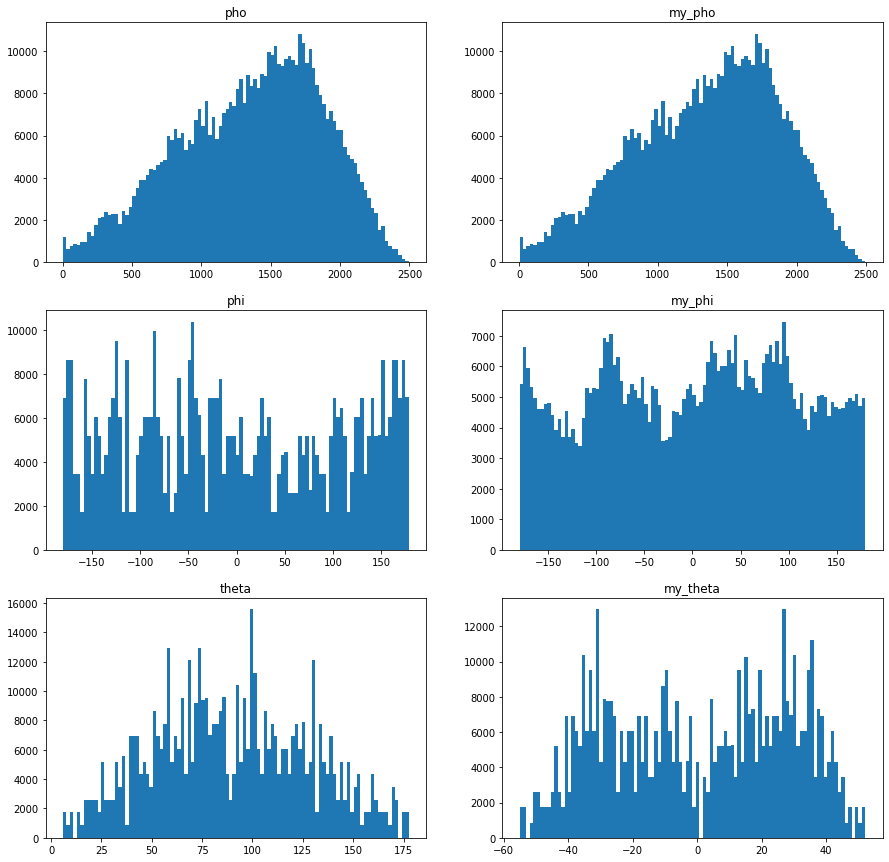

In [48]:
histos_titles = ["pho", "phi", "theta",
                 "my_pho", "my_phi", "my_theta"]

fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

for (i, curr_list, curr_title) in zip(range(len(histos_titles)), list_links, histos_titles):    
    axs[i % 3, i // 3].hist(np.array(curr_list), bins=100)
    axs[i % 3, i // 3].set_title(curr_title)
    #print(i % 3, i // 3) # (меняется от 0 до 2 с иттерациями, меняется от 0 до (len(list)/3)-1 в рамках всех иттераций)

In [52]:
from read_h5 import read_hdf5
import os

if (True):
    default_data_folder_name = "../h5_coll"

    h5_filenames_list = os.listdir(default_data_folder_name)
    
    # get only digits and cast them to `int` for comparsion function
    def comparsion_key(filename : str):
        import re
        #print(int(re.findall(r"\d+", filename)[0]))
        return int(re.findall(r"\d+", filename)[0])
    
    # get h5 files sorted
    h5_filenames_list.sort(key=comparsion_key)
    #print(h5_filenames_list)
    
    current_file_sample_info = []
    # iter number isnt neccessary, but looking pretty cool
    for (iteration_num, current_filename) in zip(range(len(h5_filenames_list)), h5_filenames_list):
        # create ref to empty list

        # assembly path to current file (folder + filename)
        current_relative_filename = default_data_folder_name + "/" + current_filename
        print("{}. current h5 file relative name is {}".format(iteration_num, current_relative_filename))
        
        read_hdf5(current_relative_filename, current_file_sample_info)

    print(len(current_file_sample_info))

0. current h5 file relative name is ../h5_coll//auto_events_1.h5
1. current h5 file relative name is ../h5_coll//auto_events_2.h5
2. current h5 file relative name is ../h5_coll//auto_events_3.h5
3. current h5 file relative name is ../h5_coll//auto_events_4.h5
4. current h5 file relative name is ../h5_coll//auto_events_5.h5
5. current h5 file relative name is ../h5_coll//auto_events_6.h5
6. current h5 file relative name is ../h5_coll//auto_events_7.h5
7. current h5 file relative name is ../h5_coll//auto_events_8.h5
8. current h5 file relative name is ../h5_coll//auto_events_9.h5
9. current h5 file relative name is ../h5_coll//auto_events_10.h5
10. current h5 file relative name is ../h5_coll//auto_events_11.h5
11. current h5 file relative name is ../h5_coll//auto_events_12.h5
12. current h5 file relative name is ../h5_coll//auto_events_13.h5
13. current h5 file relative name is ../h5_coll//auto_events_14.h5
14. current h5 file relative name is ../h5_coll//auto_events_15.h5
15. current h5

KeyboardInterrupt: 